In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
input_G=np.arange(0.1, 10, 0.1)
nodes=10
packets=50
avr_throughput=np.zeros(len(input_G))


In [20]:
for epoch in range(10):
    throughput=[]
    for G in input_G:
        l=[G/nodes]*nodes
        interarrival_times= np.zeros((nodes, packets))
        timestamps=np.zeros((nodes,packets))
        for node in range(nodes):
            interarrival_times[node] = np.around(np.random.exponential(1/l[node], (1,packets)), 3)
#            for j in range(packets):
#                if(interarrival_times[node][j] < 1):
#                    interarrival_times[node][j]=1
            timestamps[node]=np.cumsum(interarrival_times[node])
        t_max=np.amin(np.amax(timestamps, axis=1))
        #one packet duration is one second
        #slots are also of one second each
        #Slotted ALOHA
        total_packets=0
        cnt_success=0
        success_array=np.zeros(int(np.ceil(t_max)+2))
        for t in range(int(np.ceil(t_max)+1)):
            cnt_arrive=0
            for node in range(nodes):
                for timestamp in timestamps[node]:
                    if(timestamp>=t-1 and timestamp<t):
                        cnt_arrive+=1
                        total_packets+=1
            if(cnt_arrive==1):
                success_array[t]=1
                cnt_success+=1
        throughput.append(cnt_success*1.0/int(np.ceil(t_max)+1))
    throughput=np.array(throughput)
    avr_throughput+=throughput
avr_throughput/=10


In [21]:
data={"load":input_G, "tput":avr_throughput}
df=pd.DataFrame(data=data)
localtime = time.asctime( time.localtime(time.time()) )
df.to_csv("s-aloha-latest.csv".format(localtime))

In [22]:
G_max=input_G[np.argmax(avr_throughput)]
throughput_max=np.amax(avr_throughput)
print("The maximum throughput {} is attained at load {} pk/pk duration ".format(throughput_max,G_max))


The maximum throughput 0.372709846889 is attained at load 1.1 pk/pk duration 


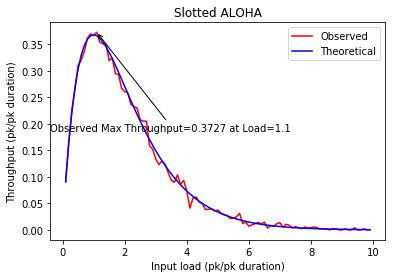

In [23]:
plt.plot(input_G, avr_throughput,'-r' ,label="Observed")
plt.plot(input_G, input_G*np.exp(-input_G),'-b', label="Theoretical")
plt.xlabel("Input load (pk/pk duration)")
plt.ylabel("Throughput (pk/pk duration)")
plt.annotate("Observed Max Throughput={} at Load={} ".format(np.around(throughput_max,4), G_max), xy=(G_max, throughput_max) , arrowprops=dict(arrowstyle="->"), textcoords='axes fraction', xytext=(0,0.5))
plt.title("Slotted ALOHA")
plt.legend()
#plt.savefig("s-aloha_2.png", format='png')